In [7]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [8]:
class NadarayaWatsonKernelRegression:
    def __init__(self, kernel='gaussian', bandwidth=1.0):
        self.kernel = kernel
        self.bandwidth = bandwidth

    def _kernel_function(self, distances):
        """Kernel function, default is Gaussian."""
        if self.kernel == 'gaussian':
            return np.exp(-0.5 * (distances / self.bandwidth) ** 2)
        else:
            raise ValueError(f"Unsupported kernel: {self.kernel}")

    def fit(self, X_train, y_train):
        """Fit the model with training data."""
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        """Predict the target values for the test data."""
        # Compute pairwise distances between test and training points
        distances = cdist(X_test, self.X_train, 'euclidean')
        
        # Apply kernel function
        weights = self._kernel_function(distances)
        
        # Normalize weights
        weights_sum = np.sum(weights, axis=1, keepdims=True)
        weights /= weights_sum
        
        # Weighted sum of the target values
        return np.dot(weights, self.y_train)

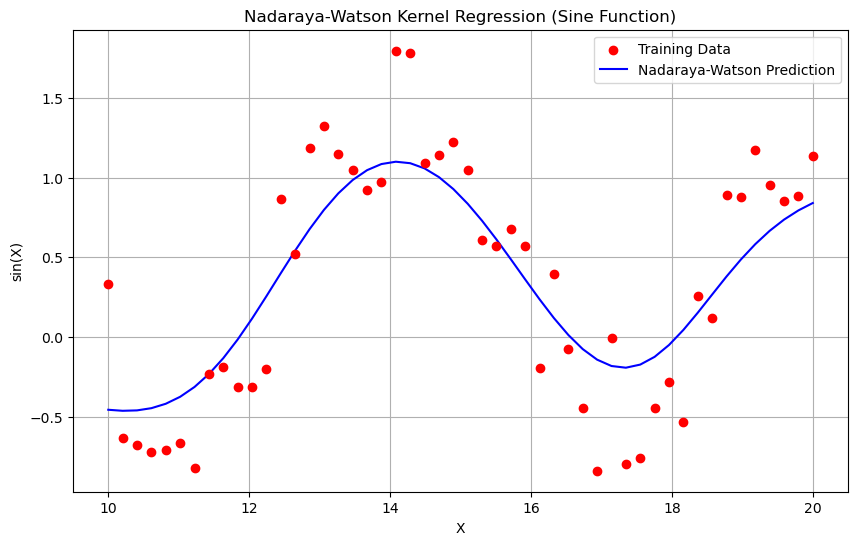

In [9]:
# Generate new training data
X_train = np.linspace(10, 20, 50)
y_train = np.sin(X_train)+ 1e-0*np.random.rand(50)

# Reshape X_train to be compatible with the Nadaraya-Watson code (n, d)
X_train = X_train.reshape(-1, 1)


# Initialize and fit the model with the new training data
nwkr = NadarayaWatsonKernelRegression(kernel='gaussian', bandwidth=0.9)
nwkr.fit(X_train, y_train)

# Predict the values
y_pred = nwkr.predict(X_train)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='red', label='Training Data', zorder=3)
plt.plot(X_train, y_pred, color='blue', label='Nadaraya-Watson Prediction', zorder=2)
plt.title('Nadaraya-Watson Kernel Regression (Sine Function)')
plt.xlabel('X')
plt.ylabel('sin(X)')
plt.legend()
plt.grid(True)
plt.show()


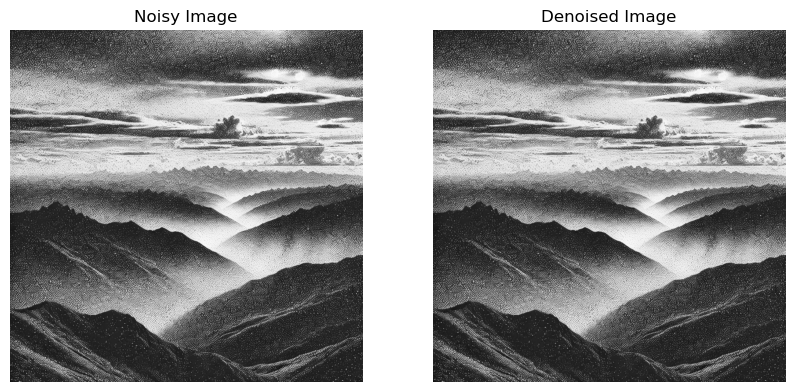

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

class NadarayaWatsonImageDenoising:
    def __init__(self, bandwidth=1.0):
        self.bandwidth = bandwidth

    def _kernel_function(self, distances):
        """Gaussian kernel function"""
        return np.exp(-0.5 * (distances / self.bandwidth) ** 2)

    def denoise(self, noisy_image, window_size=3):
        """Apply kernel regression to denoise an image"""
        denoised_image = np.zeros_like(noisy_image)
        padding = window_size // 2

        # Pad the image to handle border pixels
        padded_image = np.pad(noisy_image, padding, mode='reflect')

        # Loop through each pixel in the original image
        for i in range(noisy_image.shape[0]):
            for j in range(noisy_image.shape[1]):
                # Extract the window around the current pixel
                window = padded_image[i:i + window_size, j:j + window_size]

                # Compute pairwise distances between center pixel and its neighbors
                distances = cdist(window.reshape(-1, 1), np.array([[padded_image[i + padding, j + padding]]]), 'euclidean')

                # Apply the kernel function to compute weights
                weights = self._kernel_function(distances)

                # Normalize weights and apply weighted sum to estimate the denoised pixel
                denoised_image[i, j] = np.sum(window.flatten() * weights.flatten()) / np.sum(weights)

        return denoised_image

# Load a noisy image (for example, use a grayscale image)
noisy_image = cv2.imread('../data/noisyimage.webp', cv2.IMREAD_GRAYSCALE)

# Apply kernel regression for denoising
denoiser = NadarayaWatsonImageDenoising(bandwidth=1.0)
denoised_image = denoiser.denoise(noisy_image, window_size=5)

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

plt.show()
